In [43]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot  as plt 

In [44]:
# important functions
def read_csv(file)->pd.DataFrame:
    # read csv file from pandas
    df = pd.read_csv(file)
    # convert to numpy array 
    df = df.to_numpy()
    return df
def cosine_similarity(x,y)-> int : 
    # calculate cosine similatity of two point
    size_x=x[0]**2+x[1]**2
    size_y=y[0]**2+y[1]**2
    numarator=x[0]*y[0]+x[1]*y[1]
    return numarator / (math.sqrt(size_x)*math.sqrt(size_y))

def eucilidean_distance(x,y)->int:
    # calculate euclidiean distance of two point 
    return 1/(1+(math.sqrt(sum( (x[i]-y[i])**2 for i in range(2)))))
    
def similarity_vector (dataset,type=None)-> np.array :
    lentgh = len(dataset)
    sim_vector=np.zeros([lentgh,lentgh] , dtype=float)
    for i in range(lentgh):
        for j in range (lentgh):
            if(type == "cosine"):
                sim_vector[i][j] = cosine_similarity(dataset[i],dataset[j])
            else:
                sim_vector[i][j]=eucilidean_distance(dataset[i],dataset[j])
    return sim_vector    


In [45]:
# read data
df=read_csv('data.csv')
sim_vec_cosine=similarity_vector(df,"cosine")
sim_vec_euc=similarity_vector(df)

In [46]:
sim_vec_cosine

array([[1.        , 0.99985238, 0.99604997, ..., 0.94266984, 0.72007789,
        0.68925746],
       [0.99985238, 1.        , 0.99742859, ..., 0.94826473, 0.73189397,
        0.70160425],
       [0.99604997, 0.99742859, 1.        , ..., 0.96857935, 0.77884743,
        0.75086792],
       ...,
       [0.94266984, 0.94826473, 0.96857935, ..., 1.        , 0.91036648,
        0.89153278],
       [0.72007789, 0.73189397, 0.77884743, ..., 0.91036648, 1.        ,
        0.99905616],
       [0.68925746, 0.70160425, 0.75086792, ..., 0.89153278, 0.99905616,
        1.        ]])

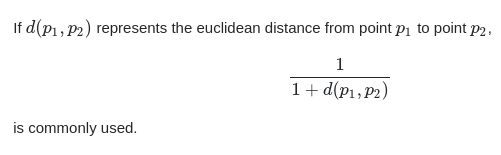

In [47]:
sim_vec_euc

array([[1.        , 0.30901699, 0.01998777, ..., 0.03834375, 0.02563238,
        0.02203387],
       [0.30901699, 1.        , 0.02088896, ..., 0.04096782, 0.02536864,
        0.02123245],
       [0.01998777, 0.02088896, 1.        , ..., 0.02429415, 0.01349853,
        0.01086892],
       ...,
       [0.03834375, 0.04096782, 0.02429415, ..., 1.        , 0.02942488,
        0.01806962],
       [0.02563238, 0.02536864, 0.01349853, ..., 0.02942488, 1.        ,
        0.03333333],
       [0.02203387, 0.02123245, 0.01086892, ..., 0.01806962, 0.03333333,
        1.        ]])

In [48]:
# kmeans  functions 
def should_stop(data_set,old,new,iteration,type):
    # stop function for kmeans
    if (old is None):
        return False
    if iteration > 400 :
        return True
    sum=0
    for i,j in zip(old,new):
        if (type != "cosine"):
            distance = eucilidean_distance(i,j)
        else: 
            distance = cosine_similarity(i,j)
                
        sum += distance
        if sum > 3.9:
            return True
    
    return False    

In [49]:
def get_random_centroids(num_featres,k):
    centroids=[]
    for i in range (k):
        temp = []
        for j in range(num_featres):
            temp.append(random.randint(0,160))
        centroids.append(temp)
    return centroids

In [50]:

def get_labes (data_set,centroids,type= None):
    labels={
        
    }
    for i in range(len(data_set)) :
            value=-1
            centroid= -1
            for j in range(len(centroids)):
                if (type == "cosine"):
                    similarity = cosine_similarity (data_set[i],centroids[j])
                else:
                    similarity = eucilidean_distance (data_set[i],centroids[j])
                if(similarity > value):
                    value =similarity
                    centroid = j 
            labels[i]= centroid
     
    return labels


In [51]:
def get_centroids(data_set,lables,k):
    centroids = []
    for i in range (k):
        count = 0
        sum_x = 0 
        sum_y = 0
        for j in range(len(data_set)):
            if lables[j] == i :
                count += 1
                sum_x += data_set[j][0]
                sum_y += data_set[j][1]
        if count == 0 :
            centroids.append([sum_x,sum_y])
        else:
            centroids.append([sum_x/count , sum_y/count])
    return centroids
    

In [52]:
# kmeans

def kmeans (data_set,k,type=None):
    num_features = len(data_set[0])
    centroids = get_random_centroids(num_features,k)
    iteration = 0
    old_centroids= None
    while not should_stop(data_set,old_centroids,centroids,iteration,type):
        old_centroids = centroids 
        iteration += 1 
        
        labels = get_labes(data_set , centroids, type)
        centroids = get_centroids ( data_set , labels ,k)
    return centroids

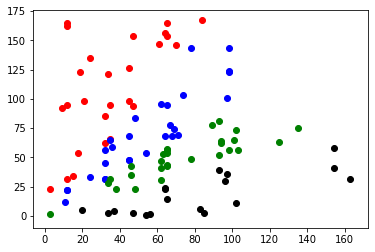

In [62]:
cos_centroids = kmeans(df,4,"cosine")
cos_lables = get_labes (df,cos_centroids,"cosine")

x=[]
y=[]
for i in range(4):
    x.append([])
    y.append([])
    for j in range(len(df)):
        if (cos_lables[j] == i):
            x[i].append(df[j][0])
            y[i].append(df[j][1])
            
plt.scatter(x[0],y[0],c='red')
plt.scatter(x[1],y[1],c='blue')
plt.scatter(x[2],y[2],c='green')
plt.scatter(x[3],y[3],c='black')

plt.show()

            

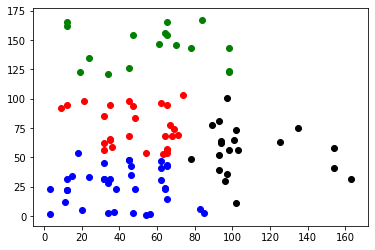

In [65]:

euc_centroids = kmeans(df,4)
euc_lables = get_labes (df,euc_centroids)

x=[]
y=[]
for i in range(4):
    x.append([])
    y.append([])
    for j in range(len(df)):
        if (euc_lables[j] == i):
            x[i].append(df[j][0])
            y[i].append(df[j][1])
            
plt.scatter(x[0],y[0],c='red')
plt.scatter(x[1],y[1],c='blue')
plt.scatter(x[2],y[2],c='green')
plt.scatter(x[3],y[3],c='black')

plt.show()
